In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm 

import functools as ft
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)

In [3]:
pd.options.mode.chained_assignment = None

# ED Visit Rates

In [4]:
mmd_data = pd.read_csv('mmd_data.csv')
mmd_data

,population,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,undefined,588
1,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,undefined,608
2,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,All,undefined,747
3,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,All,undefined,593
4,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,All,undefined,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,All,undefined,436
3214,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,All,undefined,304
3215,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,All,undefined,392
3216,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,All,undefined,460


# County Health Data

In [5]:
df_CHR = pd.read_excel('2022 County Health Rankings Data - v1.xlsx', header=[0, 1], sheet_name='Ranked Measure Data')
df_CHR.head(3)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Premature death  \
                FIPS              State             County      Unreliable   
0               1000            Alabama                NaN             NaN   
1               1001            Alabama            Autauga             NaN   
2               1003            Alabama            Baldwin             NaN   

                                                                          \
    Deaths Years of Potential Life Lost Rate  95% CI - Low 95% CI - High   
0  88086.0                      10350.071456  10246.133257  10454.009654   
1    836.0                       8027.394727   7197.625811   8857.163642   
2   3377.0                       8118.358206   7666.874101   8569.842311   

                                                           \
  Quartile YPLL Rate (AIAN) YPLL Rate (AIAN) 95% CI - Low   
0      NaN      5967.152772                   4839.918333   
1      1.0              NaN                           NaN   
2      1.0              NaN                           NaN   

                                                              \
  YPLL Rate (AIAN) 95% CI - High YPLL Rate (AIAN) Unreliable   
0                    7094.387212                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   

                                                    \
  YPLL Rate (Asian) YPLL Rate (Asian) 95% CI - Low   
0       3410.772412                    2945.367818   
1               NaN                            NaN   
2               NaN                            NaN   

                                                                \
  YPLL Rate (Asian) 95% CI - High YPLL Rate (Asian) Unreliable   
0                     3876.177007                          NaN   
1                             NaN                          NaN   
2                             NaN                          NaN   

                                                    \
  YPLL Rate (Black) YPLL Rate (Black) 95% CI - Low   
0      13245.058385                   13022.778798   
1      11548.535678                    9369.191471   
2      11603.143788                    9970.802485   

                                                                \
  YPLL Rate (Black) 95% CI - High YPLL Rate (Black) Unreliable   
0                    13467.337973                          NaN   
1                    13727.879885                          NaN   
2                    13235.485090                          NaN   

                                                          \
  YPLL Rate (Hispanic) YPLL Rate (Hispanic) 95% CI - Low   
0          5244.424847                       4900.917319   
1                  NaN                               NaN   
2          4590.548042                       3232.169463   

                                                                      \
  YPLL Rate (Hispanic) 95% CI - High YPLL Rate (Hispanic) Unreliable   
0                        5587.932376                             NaN   
1                                NaN                             NaN   
2                        6327.465781                             NaN   

                                                    \
  YPLL Rate (white) YPLL Rate (white) 95% CI - Low   
0       9562.516718                    9438.715332   
1       7332.553866                    6411.306591   
2       8058.609145                    7555.295103   

                                                                \
  YPLL Rate (white) 95% CI - High YPLL Rate (white) Unreliable   
0                     9686.318103                          NaN   
1                     8253.801142                          NaN   
2                     8561.923188                          NaN   

    Poor or fair health                                      \
  % Fair or Poor Health 95% CI - Low 95% CI - High Quartile   
0        

In [6]:
# The next two cells cleans up the two header issue from the county health rankings dataset.
geography = ['Unnamed: 0_level_0','Unnamed: 1_level_0','Unnamed: 2_level_0']
sections = ['Primary care physicians','Dentists','Mental health providers']

In [7]:
df_CHR_Features = df_CHR.iloc[:, df_CHR.columns.isin(geography+sections, level=0)]
df_CHR_Features.columns = [col[1] if col[0].startswith('Unnamed:') else ': '.join(col) for col in df_CHR_Features.columns.values]
df_CHR_Features['FIPS'] = df_CHR_Features['FIPS'].apply(str).str.zfill(5)
df_CHR_Features.head(1)

,FIPS,State,County,Primary care physicians: # Primary Care Physicians,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Primary care physicians: Quartile,Dentists: # Dentists,Dentists: Dentist Rate,Dentists: Dentist Ratio,Dentists: Quartile,Mental health providers: # Mental Health Providers,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Mental health providers: Quartile
0,01000,Alabama,NaN,3228.0,65.83476,1519:1,NaN,2429.0,49.35455,2026:1,NaN,5818.0,118.21522,846:1,NaN


In [8]:
mmd_data['fips'] = mmd_data.fips.apply(str).str.zfill(5)
mmd_data.head()

,population,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01001,Autauga County,ALABAMA,Urban,All,All,undefined,588
1,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01003,Baldwin County,ALABAMA,Rural,All,All,undefined,608
2,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01005,Barbour County,ALABAMA,Rural,All,All,undefined,747
3,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01007,Bibb County,ALABAMA,Urban,All,All,undefined,593
4,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01009,Blount County,ALABAMA,Urban,All,All,undefined,601


In [15]:
merge_df = mmd_data.merge(df_CHR_Features,how='left',left_on='fips',right_on='FIPS')

In [16]:
merge_df = merge_df.drop(['FIPS','State','County'],axis=1)

In [17]:
merge_df.columns

Index(['population', 'year', 'geography', 'measure', 'adjustment', 'analysis',
       'domain', 'condition', 'primary_sex', 'primary_age', 'primary_dual',
       'fips', 'county', 'state', 'urban', 'primary_race',
       'primary_eligibility', 'primary_denominator', 'analysis_value',
       'Primary care physicians: # Primary Care Physicians',
       'Primary care physicians: Primary Care Physicians Rate',
       'Primary care physicians: Primary Care Physicians Ratio',
       'Primary care physicians: Quartile', 'Dentists: # Dentists',
       'Dentists: Dentist Rate', 'Dentists: Dentist Ratio',
       'Dentists: Quartile',
       'Mental health providers: # Mental Health Providers',
       'Mental health providers: Mental Health Provider Rate',
       'Mental health providers: Mental Health Provider Ratio',
       'Mental health providers: Quartile'],
      dtype='object')

In [18]:
merge_df = merge_df.drop(labels=['population','year','geography','measure','adjustment','analysis','domain','condition','primary_sex'\
                         ,'primary_age','primary_dual','primary_race','primary_eligibility','primary_denominator'],axis=1)


In [19]:
merge_df = merge_df.drop(labels=['Primary care physicians: # Primary Care Physicians','Dentists: # Dentists','Mental health providers: # Mental Health Providers','Primary care physicians: Quartile','Dentists: Quartile','Mental health providers: Quartile'],axis=1)

In [24]:
merge_df['Dentists: Dentist Ratio'].str[-1].value_counts()

1    2896
0     142
Name: Dentists: Dentist Ratio, dtype: int64

In [25]:
for i in merge_df.columns:
    if('ratio' in i.lower()):
        merge_df[i]=merge_df[i].str[:-2].astype(float)


In [26]:
merge_df.isna().sum()

fips                                                        0
county                                                     13
state                                                       0
urban                                                       0
analysis_value                                              0
Primary care physicians: Primary Care Physicians Rate     240
Primary care physicians: Primary Care Physicians Ratio    240
Dentists: Dentist Rate                                    180
Dentists: Dentist Ratio                                   180
Mental health providers: Mental Health Provider Rate      294
Mental health providers: Mental Health Provider Ratio     294
dtype: int64

<AxesSubplot:xlabel='analysis_value', ylabel='Primary care physicians: Primary Care Physicians Rate'>

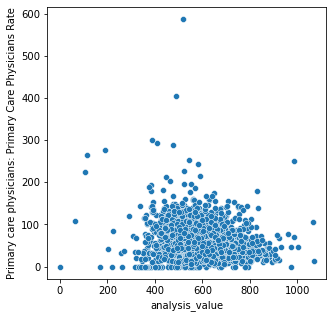

In [17]:
fig,ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=merge_df,x='analysis_value',y='Primary care physicians: Primary Care Physicians Rate')

<AxesSubplot:xlabel='analysis_value', ylabel='Mental health providers: Mental Health Provider Rate'>

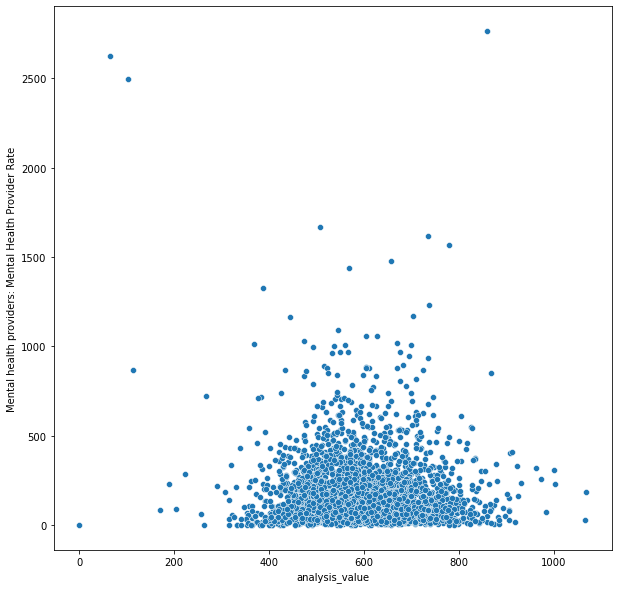

In [18]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=merge_df,x='analysis_value',y='Mental health providers: Mental Health Provider Rate')

<AxesSubplot:xlabel='analysis_value', ylabel='Dentists: Dentist Rate'>

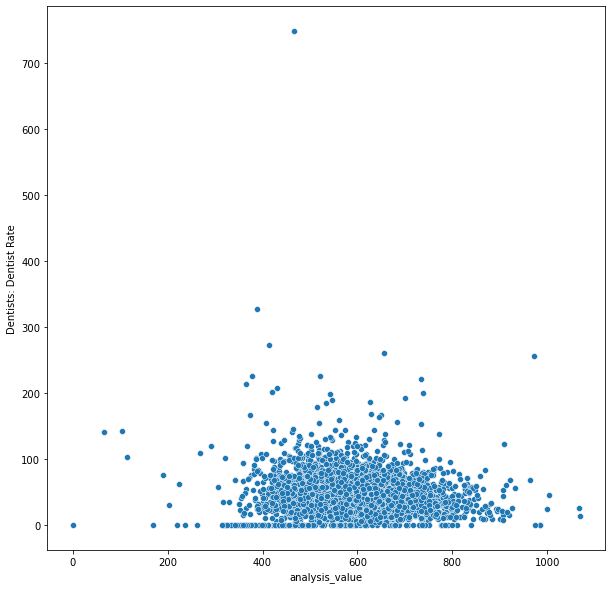

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=merge_df,x='analysis_value',y='Dentists: Dentist Rate')

In [27]:
HPSA_DH = pd.read_csv('HRSA/BCD_HPSA_FCT_DET_DH.csv')
HPSA_DH['HPSA Score'].value_counts()
HPSA_DH['State and County Federal Information Processing Standard Code']
HPSA_DH.columns

0     8208
19    4883
15    3872
17    3531
16    2410
14    2021
21    1946
13    1454
18    1394
12    1235
11    1227
10    1006
20     745
25     706
6      491
23     450
8      416
22     399
9      379
7      330
3      266
26     180
24     161
4      102
5       91
2       25
1       20
Name: HPSA Score, dtype: int64

0        54039
1        54039
2        54105
3        54031
4        54031
         ...  
37943    06023
37944    06023
37945    06023
37946    06023
37947    06023
Name: State and County Federal Information Processing Standard Code, Length: 37948, dtype: object

Index(['HPSA Name', 'HPSA ID', 'Designation Type', 'HPSA Discipline Class',
       'HPSA Score', 'Primary State Abbreviation', 'HPSA Status',
       'HPSA Designation Date', 'HPSA Designation Last Update Date',
       'Metropolitan Indicator', 'HPSA Geography Identification Number',
       'HPSA Degree of Shortage', 'Withdrawn Date', 'HPSA FTE',
       'HPSA Designation Population', '% of Population Below 100% Poverty',
       'HPSA Formal Ratio', 'HPSA Population Type', 'Rural Status',
       'Longitude', 'Latitude', 'BHCMIS Organization Identification Number',
       'Break in Designation', 'Common County Name', 'Common Postal Code',
       'Common Region Name', 'Common State Abbreviation',
       'Common State County FIPS Code', 'Common State FIPS Code',
       'Common State Name', 'County Equivalent Name',
       'County or County Equivalent Federal Information Processing Standard Code',
       'Discipline Class Number', 'HPSA Address', 'HPSA City',
       'HPSA Component Name', 'H

In [20]:
HPSA_DH['Rural Status']
HPSA_DH['Common State County FIPS Code']

0        Non-Rural
1        Non-Rural
2            Rural
3            Rural
4            Rural
           ...    
37943        Rural
37944        Rural
37945        Rural
37946        Rural
37947        Rural
Name: Rural Status, Length: 37948, dtype: object

0        54039
1        54039
2        54105
3        54031
4        54031
         ...  
37943    06023
37944    06023
37945    06023
37946    06023
37947    06023
Name: Common State County FIPS Code, Length: 37948, dtype: object

In [28]:
def condense_df(df,prefix):
    df_subset = df[['HPSA Score','% of Population Below 100% Poverty','Common State County FIPS Code','HPSA Estimated Underserved Population','HPSA Estimated Served Population']]
    grouped_df = df_subset.groupby('Common State County FIPS Code').agg('mean')
    
    if('XXXXX' in grouped_df.index):
        grouped_df.drop(['XXXXX'],inplace=True)
    
    mapping = {}
    for column in df_subset.columns:
        mapping[column]=prefix+column
    grouped_df = grouped_df.rename(mapper=mapping,axis='columns')
    
    return grouped_df

HPSA_DH_SUB = condense_df(HPSA_DH,"Dental Health: ")
HPSA_DH_SUB['FIPS']=HPSA_DH_SUB.index
HPSA_DH_SUB

,Dental Health: HPSA Score,Dental Health: % of Population Below 100% Poverty,Dental Health: HPSA Estimated Underserved Population,Dental Health: HPSA Estimated Served Population,FIPS
Common State County FIPS Code,,,,,
01001,17.00,16.900000,65590.000000,9556.000000,01001
01003,8.50,17.900000,182060.000000,49960.000000,01003
01005,16.25,24.400000,11858.500000,3260.000000,01005
01007,15.80,18.150000,32300.500000,12598.500000,01007
01009,15.50,15.450000,17867.000000,3586.500000,01009
...,...,...,...,...,...
72151,12.00,51.600000,31808.000000,68491.000000,72151
72153,12.00,48.800000,65217.500000,15888.000000,72153
78010,3.00,21.342105,20760.789474,4065.263158,78010


In [31]:
df1 = merge_df.merge(HPSA_DH_SUB,how='left',left_on='fips',right_on='FIPS')
df1.drop(labels=['FIPS'],axis=1,inplace=True)
df1.isna().sum()

fips                                                        0
county                                                     13
state                                                       0
urban                                                       0
analysis_value                                              0
Primary care physicians: Primary Care Physicians Rate     240
Primary care physicians: Primary Care Physicians Ratio    240
Dentists: Dentist Rate                                    180
Dentists: Dentist Ratio                                   180
Mental health providers: Mental Health Provider Rate      294
Mental health providers: Mental Health Provider Ratio     294
Dental Health: HPSA Score                                 240
Dental Health: % of Population Below 100% Poverty         601
Dental Health: HPSA Estimated Underserved Population      471
Dental Health: HPSA Estimated Served Population           471
dtype: int64

In [32]:
HPSA_MH = pd.read_csv('HRSA/BCD_HPSA_FCT_DET_MH.csv')
HPSA_MH_SUB = condense_df(HPSA_MH,'Mental Health: ')
HPSA_MH_SUB['FIPS']=HPSA_MH_SUB.index
HPSA_MH_SUB

,Mental Health: HPSA Score,Mental Health: % of Population Below 100% Poverty,Mental Health: HPSA Estimated Underserved Population,Mental Health: HPSA Estimated Served Population,FIPS
Common State County FIPS Code,,,,,
01001,13.000000,18.050000,68234.000000,181525.000000,01001
01003,13.250000,12.633333,26996.545455,15288.636364,01003
01005,14.200000,19.400000,41980.000000,112400.000000,01005
01007,16.800000,18.500000,86303.500000,3975.000000,01007
01009,18.500000,16.850000,234168.500000,48520.000000,01009
...,...,...,...,...,...
72151,10.333333,52.550000,55490.500000,10000.000000,72151
72153,10.500000,49.000000,29424.000000,0.000000,72153
78010,20.500000,27.700000,17936.000000,32310.000000,78010


In [33]:
df2 = df1.merge(HPSA_MH_SUB,how='left',left_on='fips',right_on='FIPS')
df2.drop(labels=['FIPS'],axis=1,inplace=True)
df2.isna().sum()
df2

fips                                                        0
county                                                     13
state                                                       0
urban                                                       0
analysis_value                                              0
Primary care physicians: Primary Care Physicians Rate     240
Primary care physicians: Primary Care Physicians Ratio    240
Dentists: Dentist Rate                                    180
Dentists: Dentist Ratio                                   180
Mental health providers: Mental Health Provider Rate      294
Mental health providers: Mental Health Provider Ratio     294
Dental Health: HPSA Score                                 240
Dental Health: % of Population Below 100% Poverty         601
Dental Health: HPSA Estimated Underserved Population      471
Dental Health: HPSA Estimated Served Population           471
Mental Health: HPSA Score                                  56
Mental H

,fips,county,state,urban,analysis_value,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Dentists: Dentist Rate,Dentists: Dentist Ratio,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Dental Health: HPSA Score,Dental Health: % of Population Below 100% Poverty,Dental Health: HPSA Estimated Underserved Population,Dental Health: HPSA Estimated Served Population,Mental Health: HPSA Score,Mental Health: % of Population Below 100% Poverty,Mental Health: HPSA Estimated Underserved Population,Mental Health: HPSA Estimated Served Population
0,01001,Autauga County,ALABAMA,Urban,588,44.74753,2235.0,33.84095,2955.0,37.40315,2674.0,17.00,16.90,65590.0,9556.0,13.000000,18.050000,68234.000000,181525.000000
1,01003,Baldwin County,ALABAMA,Rural,608,68.98591,1450.0,48.84708,2047.0,99.43869,1006.0,8.50,17.90,182060.0,49960.0,13.250000,12.633333,26996.545455,15288.636364
2,01005,Barbour County,ALABAMA,Rural,747,36.45791,2743.0,36.60173,2732.0,24.40115,4098.0,16.25,24.40,11858.5,3260.0,14.200000,19.400000,41980.000000,112400.000000
3,01007,Bibb County,ALABAMA,Urban,593,58.05126,1723.0,27.10517,3689.0,27.10517,3689.0,15.80,18.15,32300.5,12598.5,16.800000,18.500000,86303.500000,3975.000000
4,01009,Blount County,ALABAMA,Urban,601,22.48124,4448.0,19.00517,5262.0,17.27742,5788.0,15.50,15.45,17867.0,3586.5,18.500000,16.850000,234168.500000,48520.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72145,Vega Baja Municipio,PUERTO RICO,Urban,436,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,38534.0,48000.0,10.000000,51.800000,233700.000000,8600.000000
3214,72147,Vieques Municipio,PUERTO RICO,Rural,304,NaN,NaN,NaN,NaN,NaN,NaN,13.00,52.60,24057.0,70120.0,12.333333,47.050000,8069.000000,0.000000
3215,72149,Villalba Municipio,PUERTO RICO,Urban,392,NaN,NaN,NaN,NaN,NaN,NaN,9.00,46.40,31127.5,50256.0,13.000000,48.550000,50348.500000,11300.000000
3216,72151,Yabucoa Municipio,PUERTO RICO,Urban,460,NaN,NaN,NaN,NaN,NaN,NaN,12.00,51.60,31808.0,68491.0,10.333333,52.550000,55490.500000,10000.000000


In [34]:
HPSA_PC = pd.read_csv('HRSA/BCD_HPSA_FCT_DET_PC.csv')
HPSA_PC_SUB = condense_df(HPSA_PC,'Primary Care: ')
HPSA_PC_SUB['FIPS']=HPSA_PC_SUB.index
HPSA_PC_SUB

,Primary Care: HPSA Score,Primary Care: % of Population Below 100% Poverty,Primary Care: HPSA Estimated Underserved Population,Primary Care: HPSA Estimated Served Population,FIPS
Common State County FIPS Code,,,,,
01001,13.000000,19.126667,42831.866667,40162.333333,01001
01003,13.666667,15.011538,16227.230769,19090.192308,01003
01005,10.888889,29.900000,-139.000000,10305.833333,01005
01007,16.750000,18.100000,2607.000000,18025.000000,01007
01009,7.000000,13.500000,4170.000000,52938.000000,01009
...,...,...,...,...,...
72151,6.000000,100.000000,86040.666667,27000.000000,72151
72153,4.250000,76.350000,58350.750000,30495.000000,72153
78010,10.571429,35.100000,-338.833333,22040.000000,78010


In [35]:
df3 = df2.merge(HPSA_PC_SUB,how='left',left_on='fips',right_on='FIPS')
df3.drop(labels=['FIPS'],axis=1,inplace=True)
df3.isna().sum()
df3

fips                                                        0
county                                                     13
state                                                       0
urban                                                       0
analysis_value                                              0
Primary care physicians: Primary Care Physicians Rate     240
Primary care physicians: Primary Care Physicians Ratio    240
Dentists: Dentist Rate                                    180
Dentists: Dentist Ratio                                   180
Mental health providers: Mental Health Provider Rate      294
Mental health providers: Mental Health Provider Ratio     294
Dental Health: HPSA Score                                 240
Dental Health: % of Population Below 100% Poverty         601
Dental Health: HPSA Estimated Underserved Population      471
Dental Health: HPSA Estimated Served Population           471
Mental Health: HPSA Score                                  56
Mental H

,fips,county,state,urban,analysis_value,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Dentists: Dentist Rate,Dentists: Dentist Ratio,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Dental Health: HPSA Score,Dental Health: % of Population Below 100% Poverty,Dental Health: HPSA Estimated Underserved Population,Dental Health: HPSA Estimated Served Population,Mental Health: HPSA Score,Mental Health: % of Population Below 100% Poverty,Mental Health: HPSA Estimated Underserved Population,Mental Health: HPSA Estimated Served Population,Primary Care: HPSA Score,Primary Care: % of Population Below 100% Poverty,Primary Care: HPSA Estimated Underserved Population,Primary Care: HPSA Estimated Served Population
0,01001,Autauga County,ALABAMA,Urban,588,44.74753,2235.0,33.84095,2955.0,37.40315,2674.0,17.00,16.90,65590.0,9556.0,13.000000,18.050000,68234.000000,181525.000000,13.000000,19.126667,42831.866667,40162.333333
1,01003,Baldwin County,ALABAMA,Rural,608,68.98591,1450.0,48.84708,2047.0,99.43869,1006.0,8.50,17.90,182060.0,49960.0,13.250000,12.633333,26996.545455,15288.636364,13.666667,15.011538,16227.230769,19090.192308
2,01005,Barbour County,ALABAMA,Rural,747,36.45791,2743.0,36.60173,2732.0,24.40115,4098.0,16.25,24.40,11858.5,3260.0,14.200000,19.400000,41980.000000,112400.000000,10.888889,29.900000,-139.000000,10305.833333
3,01007,Bibb County,ALABAMA,Urban,593,58.05126,1723.0,27.10517,3689.0,27.10517,3689.0,15.80,18.15,32300.5,12598.5,16.800000,18.500000,86303.500000,3975.000000,16.750000,18.100000,2607.000000,18025.000000
4,01009,Blount County,ALABAMA,Urban,601,22.48124,4448.0,19.00517,5262.0,17.27742,5788.0,15.50,15.45,17867.0,3586.5,18.500000,16.850000,234168.500000,48520.000000,7.000000,13.500000,4170.000000,52938.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72145,Vega Baja Municipio,PUERTO RICO,Urban,436,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,38534.0,48000.0,10.000000,51.800000,233700.000000,8600.000000,0.000000,NaN,43034.000000,43500.000000
3214,72147,Vieques Municipio,PUERTO RICO,Rural,304,NaN,NaN,NaN,NaN,NaN,NaN,13.00,52.60,24057.0,70120.0,12.333333,47.050000,8069.000000,0.000000,11.500000,52.600000,23926.000000,69520.000000
3215,72149,Villalba Municipio,PUERTO RICO,Urban,392,NaN,NaN,NaN,NaN,NaN,NaN,9.00,46.40,31127.5,50256.0,13.000000,48.550000,50348.500000,11300.000000,4.666667,73.900000,36449.666667,50707.666667
3216,72151,Yabucoa Municipio,PUERTO RICO,Urban,460,NaN,NaN,NaN,NaN,NaN,NaN,12.00,51.60,31808.0,68491.0,10.333333,52.550000,55490.500000,10000.000000,6.000000,100.000000,86040.666667,27000.000000


In [36]:
df3.isna().sum()

fips                                                        0
county                                                     13
state                                                       0
urban                                                       0
analysis_value                                              0
Primary care physicians: Primary Care Physicians Rate     240
Primary care physicians: Primary Care Physicians Ratio    240
Dentists: Dentist Rate                                    180
Dentists: Dentist Ratio                                   180
Mental health providers: Mental Health Provider Rate      294
Mental health providers: Mental Health Provider Ratio     294
Dental Health: HPSA Score                                 240
Dental Health: % of Population Below 100% Poverty         601
Dental Health: HPSA Estimated Underserved Population      471
Dental Health: HPSA Estimated Served Population           471
Mental Health: HPSA Score                                  56
Mental H

In [28]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
analysis_value,3218.0,592.767557,114.948989,0.0,523.000000,592.000000,664.000000,1.167000e+03
Primary care physicians: Primary Care Physicians Rate,2978.0,54.444955,36.456786,0.0,30.785488,47.164885,71.353590,5.869446e+02
Primary care physicians: Primary Care Physicians Ratio,2978.0,2707.325386,2373.255195,169.0,1358.250000,2052.500000,3076.000000,2.832400e+04
Dentists: Dentist Rate,3038.0,47.427330,33.138715,0.0,27.114980,42.777830,63.218740,7.487442e+02
Dentists: Dentist Ratio,3038.0,2917.436142,2425.496528,134.0,1527.250000,2228.500000,3340.000000,3.045700e+04
Mental health providers: Mental Health Provider Rate,2924.0,179.831302,196.975079,0.0,54.392178,123.934290,237.341862,2.764911e+03
Mental health providers: Mental Health Provider Ratio,2924.0,1574.484952,2282.013955,36.0,420.000000,789.000000,1730.250000,3.286500e+04
Dental Health: HPSA Score,2978.0,12.701725,5.081953,0.0,10.000000,13.447632,16.200000,2.600000e+01
Dental Health: % of Population Below 100% Poverty,2617.0,18.149467,8.753537,0.0,12.870455,16.400000,21.300000,8.078571e+01
Dental Health: HPSA Estimated Underserved Population,2747.0,10922.090451,17876.606274,-130243.0,2398.625000,5975.048780,13951.438073,1.820600e+05


In [37]:
df3.shape

(3218, 23)

In [38]:
df3

,fips,county,state,urban,analysis_value,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Dentists: Dentist Rate,Dentists: Dentist Ratio,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Dental Health: HPSA Score,Dental Health: % of Population Below 100% Poverty,Dental Health: HPSA Estimated Underserved Population,Dental Health: HPSA Estimated Served Population,Mental Health: HPSA Score,Mental Health: % of Population Below 100% Poverty,Mental Health: HPSA Estimated Underserved Population,Mental Health: HPSA Estimated Served Population,Primary Care: HPSA Score,Primary Care: % of Population Below 100% Poverty,Primary Care: HPSA Estimated Underserved Population,Primary Care: HPSA Estimated Served Population
0,01001,Autauga County,ALABAMA,Urban,588,44.74753,2235.0,33.84095,2955.0,37.40315,2674.0,17.00,16.90,65590.0,9556.0,13.000000,18.050000,68234.000000,181525.000000,13.000000,19.126667,42831.866667,40162.333333
1,01003,Baldwin County,ALABAMA,Rural,608,68.98591,1450.0,48.84708,2047.0,99.43869,1006.0,8.50,17.90,182060.0,49960.0,13.250000,12.633333,26996.545455,15288.636364,13.666667,15.011538,16227.230769,19090.192308
2,01005,Barbour County,ALABAMA,Rural,747,36.45791,2743.0,36.60173,2732.0,24.40115,4098.0,16.25,24.40,11858.5,3260.0,14.200000,19.400000,41980.000000,112400.000000,10.888889,29.900000,-139.000000,10305.833333
3,01007,Bibb County,ALABAMA,Urban,593,58.05126,1723.0,27.10517,3689.0,27.10517,3689.0,15.80,18.15,32300.5,12598.5,16.800000,18.500000,86303.500000,3975.000000,16.750000,18.100000,2607.000000,18025.000000
4,01009,Blount County,ALABAMA,Urban,601,22.48124,4448.0,19.00517,5262.0,17.27742,5788.0,15.50,15.45,17867.0,3586.5,18.500000,16.850000,234168.500000,48520.000000,7.000000,13.500000,4170.000000,52938.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72145,Vega Baja Municipio,PUERTO RICO,Urban,436,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,38534.0,48000.0,10.000000,51.800000,233700.000000,8600.000000,0.000000,NaN,43034.000000,43500.000000
3214,72147,Vieques Municipio,PUERTO RICO,Rural,304,NaN,NaN,NaN,NaN,NaN,NaN,13.00,52.60,24057.0,70120.0,12.333333,47.050000,8069.000000,0.000000,11.500000,52.600000,23926.000000,69520.000000
3215,72149,Villalba Municipio,PUERTO RICO,Urban,392,NaN,NaN,NaN,NaN,NaN,NaN,9.00,46.40,31127.5,50256.0,13.000000,48.550000,50348.500000,11300.000000,4.666667,73.900000,36449.666667,50707.666667
3216,72151,Yabucoa Municipio,PUERTO RICO,Urban,460,NaN,NaN,NaN,NaN,NaN,NaN,12.00,51.60,31808.0,68491.0,10.333333,52.550000,55490.500000,10000.000000,6.000000,100.000000,86040.666667,27000.000000


# AHRF Data

In [29]:
with open('HRSA/AHRF/ahrf2023GEO.csv') as f:
    print(f)

<_io.TextIOWrapper name='HRSA/AHRF/ahrf2023GEO.csv' mode='r' encoding='cp1252'>


In [39]:
#HP, HF
AHRF_HF = pd.read_csv('HRSA/AHRF/ahrf2023HF.csv')
AHRF_HF.fips_st_cnty = AHRF_HF.fips_st_cnty.apply(str).str.zfill(5)
AHRF_HF

,fips_st_cnty,cnty_name_st_abbrev,hosp_21,hosp_20,stgh_21,stgh_20,stngh_21,stngh_20,lth_21,lth_20,sth_psych_21,sth_psych_20,sth_rehab_21,sth_rehab_20,sth_child_med_21,sth_child_med_20,sth_child_psych_21,sth_child_psych_20,stlt_acute_cares_21,stlt_acute_cares_20,ltgh_med_surg_hosp_21,ltgh_med_surg_hosp_20,lth_psych_21,lth_psych_20,lth_rehab_21,lth_rehab_20,lth_chronc_dis_21,lth_chronc_dis_20,lth_intel_disblts_21,lth_intel_disblts_20,lth_child_psych_21,lth_child_psych_20,lth_acute_long_care_hosp_21,lth_acute_long_care_hosp_20,sth_comn_21,sth_comn_20,vetn_hosp_21,vetn_hosp_20,critcl_access_hosp_21,critcl_access_hosp_20,stgh_critcl_access_21,stgh_critcl_access_20,rural_refrrl_ctr_21,rural_refrrl_ctr_20,sole_comn_provdrs_21,sole_comn_provdrs_20,stgh_jcaho_accred_21,stgh_jcaho_accred_20,stnglth_jcaho_accred_21,stnglth_jcaho_accred_20,stgh_dnv_accred_21,stgh_dnv_accred_20,stnglth_dnv_accred_21,stnglth_dnv_accred_20,stgh_acs_cancr_pgm_approvd_21,stgh_acs_cancr_pgm_approvd_20,stnglth_acs_cancr_pgm_approvd_21,stnglth_acs_cancr_pgm_approvd_20,stgh_resdncy_tranng_21,stgh_resdncy_tranng_20,stnglth_resdncy_tranng_21,stnglth_resdncy_tranng_20,stgh_med_sch_affil_21,stgh_med_sch_affil_20,stnglth_med_sch_affil_21,stnglth_med_sch_affil_20,vetn_hosp_med_sch_affil_21,vetn_hosp_med_sch_affil_20,stgh_carf_accred_21,stgh_carf_accred_20,stnglth_carf_accred_21,stnglth_carf_accred_20,stgh_membr_coth_21,stgh_membr_coth_20,vetn_hosp_membr_coth_21,vetn_hosp_membr_coth_20,sth_comn_membr_coth_21,sth_comn_membr_coth_20,stnglth_membr_coth_21,stnglth_membr_coth_20,stgh_aoa_accred_21,stgh_aoa_accred_20,stnglth_aoa_accred_21,stnglth_aoa_accred_20,stgh_medcr_cert_21,stgh_medcr_cert_20,stnglth_medcr_cert_21,stnglth_medcr_cert_20,hosp_adm_21,hosp_adm_20,stgh_hosp_adm_21,stgh_hosp_adm_20,stnglth_hosp_adm_21,stnglth_hosp_adm_20,sth_comn_hosp_adm_21,sth_comn_hosp_adm_20,vetn_hosp_hosp_adm_21,vetn_hosp_hosp_adm_20,hosp_nh_adm_21,hosp_nh_adm_20,stgh_nh_adm_21,stgh_nh_adm_20,stnglth_nh_adm_21,stnglth_nh_adm_20,medcr_ffs_acute_readm_21,medcr_ffs_acute_readm_20,medcr_ffs_hosp_readm_rate_21,medcr_ffs_hosp_readm_rate_20,medcr_ffs_prev_hosp_rate_20,medcr_ffs_prev_hosp_rate_19,hosp_beds_21,hosp_beds_20,stgh_hosp_beds_21,stgh_hosp_beds_20,stngh_hosp_beds_21,stngh_hosp_beds_20,lth_hosp_beds_21,lth_hosp_beds_20,sth_comn_hosp_beds_21,sth_comn_hosp_beds_20,vetn_hosp_hosp_beds_21,vetn_hosp_hosp_beds_20,hosp_nh_beds_21,hosp_nh_beds_20,stgh_nh_beds_21,stgh_nh_beds_20,stngh_nh_beds_21,stngh_nh_beds_20,lth_nh_beds_21,lth_nh_beds_20,hosp_licd_beds_21,hosp_licd_beds_20,stgh_licd_hosp_beds_21,stgh_licd_hosp_beds_20,stngh_licd_hosp_beds_21,stngh_licd_hosp_beds_20,lth_licd_hosp_beds_21,lth_licd_hosp_beds_20,hosp_licd_nh_beds_21,hosp_licd_nh_beds_20,stgh_licd_nh_beds_21,stgh_licd_nh_beds_20,stngh_licd_nh_beds_21,stngh_licd_nh_beds_20,lth_licd_nh_beds_21,lth_licd_nh_beds_20,stgh_bassnts_21,stgh_bassnts_20,stnglth_bassnts_21,stnglth_bassnts_20,stgh_006_049_beds_21,stgh_006_049_beds_20,stgh_050_099_beds_21,stgh_050_099_beds_20,stgh_100_199_beds_21,stgh_100_199_beds_20,stgh_200_299_beds_21,stgh_200_299_beds_20,stgh_ge300_beds_21,stgh_ge300_beds_20,stnglth_006_049_beds_21,stnglth_006_049_beds_20,stnglth_050_099_beds_21,stnglth_050_099_beds_20,stnglth_100_199_beds_21,stnglth_100_199_beds_20,stnglth_200_299_beds_21,stnglth_200_299_beds_20,stnglth_ge300_beds_21,stnglth_ge300_beds_20,vetn_hosp_006_049_beds_21,vetn_hosp_006_049_beds_20,vetn_hosp_050_099_beds_21,vetn_hosp_050_099_beds_20,vetn_hosp_100_199_beds_21,vetn_hosp_100_199_beds_20,vetn_hosp_200_299_beds_21,vetn_hosp_200_299_beds_20,vetn_hosp_ge300_beds_21,vetn_hosp_ge300_beds_20,stgh_gen_med_surg_care_adult_21,stgh_gen_med_surg_care_ped_21,stgh_obstetrc_care_21,stgh_med_surg_icu_21,stgh_card_icu_21,stgh_neonat_icu_21,stgh_neonat_interm_care_21,stgh_ped_icu_21,stgh_burn_care_21,stgh_oth_specl_care_21,stgh_oth_icu_21,stgh_rehab_care_21,stgh_substnc_use_inpat_care_21,stgh_psych_care_21,stgh_skilld_nursng_care_21,stgh_interm_care_21,stgh_acute_long_t

In [47]:
ahrf_hf_sub = ['fips_st_cnty',
               'snf_22',
               'snf_beds_22',
               'snf_cert_beds_22',                
               'nurs_fac_22',                     
               'nurs_fac_beds_22',                
               'nurs_fac_cert_beds_22',         
               'home_hlth_agencs_22',
               'rural_hlth_clincs_22',            
               'ambultry_surg_ctr_22',            
               'hospcs_22',                       
               'comn_mentl_hlth_ctr_22',          
               'nhsc_activ_sites_22']


fips_st_cnty              0
snf_22                    8
snf_beds_22               8
snf_cert_beds_22          8
nurs_fac_22               8
nurs_fac_beds_22          8
nurs_fac_cert_beds_22     8
home_hlth_agencs_22       8
rural_hlth_clincs_22      8
ambultry_surg_ctr_22      8
hospcs_22                 8
comn_mentl_hlth_ctr_22    8
nhsc_activ_sites_22       7
dtype: int64

In [45]:
df3

,fips,county,state,urban,analysis_value,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Dentists: Dentist Rate,Dentists: Dentist Ratio,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Dental Health: HPSA Score,Dental Health: % of Population Below 100% Poverty,Dental Health: HPSA Estimated Underserved Population,Dental Health: HPSA Estimated Served Population,Mental Health: HPSA Score,Mental Health: % of Population Below 100% Poverty,Mental Health: HPSA Estimated Underserved Population,Mental Health: HPSA Estimated Served Population,Primary Care: HPSA Score,Primary Care: % of Population Below 100% Poverty,Primary Care: HPSA Estimated Underserved Population,Primary Care: HPSA Estimated Served Population
0,01001,Autauga County,ALABAMA,Urban,588,44.74753,2235.0,33.84095,2955.0,37.40315,2674.0,17.00,16.90,65590.0,9556.0,13.000000,18.050000,68234.000000,181525.000000,13.000000,19.126667,42831.866667,40162.333333
1,01003,Baldwin County,ALABAMA,Rural,608,68.98591,1450.0,48.84708,2047.0,99.43869,1006.0,8.50,17.90,182060.0,49960.0,13.250000,12.633333,26996.545455,15288.636364,13.666667,15.011538,16227.230769,19090.192308
2,01005,Barbour County,ALABAMA,Rural,747,36.45791,2743.0,36.60173,2732.0,24.40115,4098.0,16.25,24.40,11858.5,3260.0,14.200000,19.400000,41980.000000,112400.000000,10.888889,29.900000,-139.000000,10305.833333
3,01007,Bibb County,ALABAMA,Urban,593,58.05126,1723.0,27.10517,3689.0,27.10517,3689.0,15.80,18.15,32300.5,12598.5,16.800000,18.500000,86303.500000,3975.000000,16.750000,18.100000,2607.000000,18025.000000
4,01009,Blount County,ALABAMA,Urban,601,22.48124,4448.0,19.00517,5262.0,17.27742,5788.0,15.50,15.45,17867.0,3586.5,18.500000,16.850000,234168.500000,48520.000000,7.000000,13.500000,4170.000000,52938.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72145,Vega Baja Municipio,PUERTO RICO,Urban,436,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,38534.0,48000.0,10.000000,51.800000,233700.000000,8600.000000,0.000000,NaN,43034.000000,43500.000000
3214,72147,Vieques Municipio,PUERTO RICO,Rural,304,NaN,NaN,NaN,NaN,NaN,NaN,13.00,52.60,24057.0,70120.0,12.333333,47.050000,8069.000000,0.000000,11.500000,52.600000,23926.000000,69520.000000
3215,72149,Villalba Municipio,PUERTO RICO,Urban,392,NaN,NaN,NaN,NaN,NaN,NaN,9.00,46.40,31127.5,50256.0,13.000000,48.550000,50348.500000,11300.000000,4.666667,73.900000,36449.666667,50707.666667
3216,72151,Yabucoa Municipio,PUERTO RICO,Urban,460,NaN,NaN,NaN,NaN,NaN,NaN,12.00,51.60,31808.0,68491.0,10.333333,52.550000,55490.500000,10000.000000,6.000000,100.000000,86040.666667,27000.000000
